
# Exploratory Data Analysis Notebook #1 (Introductory)

This notebook going to just be an introductory overview of our research group (n=121) and representing some of their demographics graphically.
We'll be going over some basic demographics: Gender, age distribution, height/weight, preferred climbing disciplines



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
dataframe = dataframe.dropna(axis=1, how='all')
dataframe = dataframe.dropna(axis=0, how='all')
print(dataframe.head())f



     #     SEX  AGE (YRS)  HEIGHT (CM)  BODY MASS (KG)  YRS CLIMBING  \
0  0.0  Female       38.0        164.0            56.5          10.0   
1  1.0  Female       28.0        157.5            56.1          13.0   
2  2.0  Female       26.0        159.0            51.8           2.0   
3  3.0  Female       26.0        169.0            56.3           8.0   
4  4.0  Female       22.0        173.5            71.8           8.0   

   CLIMB HRS WEEK  TRAIN HRS WEEK  SPORT GRADE IRCRA  BOULDER GRADE IRCRA  \
0             3.0             0.0                NaN                 19.0   
1            14.0             4.0                NaN                 21.5   
2             5.0             0.8                NaN                 17.0   
3             6.0             2.0               15.0                 19.0   
4             9.0             2.0                NaN                 20.5   

   # REPS  PEAK FORCE (KG) PEAK FORCE % BODY MASS  CF (KG) CF % PEAK FORCE  \
0    24.0            33.28

## Gender
Out of our 121 participants: 56 were female, 65 were male.

SEX
Female    56
Male      65
dtype: int64


<AxesSubplot:ylabel='Gender'>

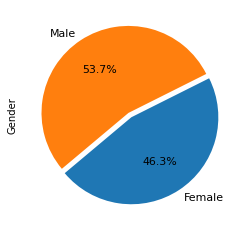

In [7]:
# #gender pie chart
gender_explode = (0.03,0.03)

#removed new dataframe
gender_pie = dataframe.groupby(by='SEX').size()
print(gender_pie)
gender_pie.plot.pie(autopct="%.1f%%", fontsize=11, label="Gender", explode=gender_explode, startangle = 220)


## Age Distribution 
The majority of our research group are between the ages of 25 and 35.

<AxesSubplot:>

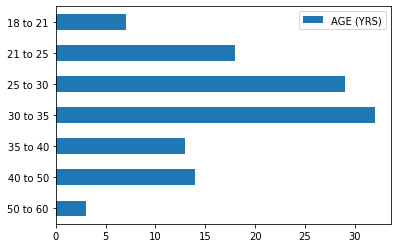

In [9]:

age_bins = [18, 21, 25, 30, 35, 40, 50, 60]
age_bin_labels = ['18 to 21', '21 to 25','25 to 30','30 to 35','35 to 40', '40 to 50', '50 to 60']


age_bin = (pd.cut(dataframe['AGE (YRS)'],bins=age_bins,labels =age_bin_labels).value_counts().sort_index(ascending=False)).to_frame()
# print(age_bin)
age_bin.plot(kind='barh')

## Scatterplot Height (CM) vs Weight (KG)
Represented values of all 121 climbers in Seaborn

Nothing big, but there's a small cluster of 5'6 130ish pound people (my people!)


<AxesSubplot:xlabel='HEIGHT (CM)', ylabel='BODY MASS (KG)'>

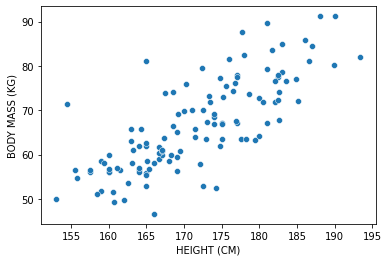

In [11]:
# Using same original dataframe

#Create Seaborn Scatterplot
sns.scatterplot(data = dataframe, x="HEIGHT (CM)", y="BODY MASS (KG)")

## Climbing Disciplines:  Sport vs Bouldering vs Both

Pretty even distribution of sport climbers and boulderers!



In [57]:
#Value of climbers that only boulder (Intersection of all Boulderers with non NaN values and Sport Climbers NaN values)
only_boulder = (dataframe['BOULDER GRADE IRCRA'].notnull() & dataframe['SPORT GRADE IRCRA'].isnull()).sum()
only_boulder

41

In [36]:
#Value of climbers that only sport climb (Intersection of all Sport Climbers with non NaN values and Boulderers NaN values)
only_sport = (dataframe['BOULDER GRADE IRCRA'].isnull() & dataframe['SPORT GRADE IRCRA'].notnull()).sum()
only_sport

49

In [45]:
#Value of climbers that do both (Both non NaN values)
both = (dataframe['SPORT GRADE IRCRA'].notnull() & dataframe['BOULDER GRADE IRCRA'].notnull()).sum()
both

31

(0.0, 60.0)

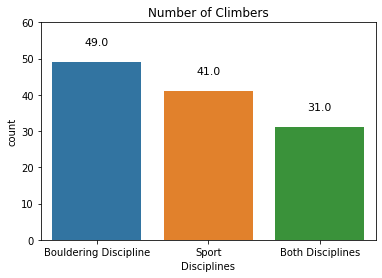

In [59]:
# Create a new dataframe to represent this information
db = {'Disciplines': ["Bouldering Discipline", "Sport", "Both Disciplines"], 'count': [only_sport, only_boulder, both]}
disciplines_bar = pd.DataFrame(db)

# Plot dataframe in a seaborn barplot
ax = sns.barplot(data=disciplines_bar, x="Disciplines", y="count")
plt.title('Number of Climbers')

# Create annotations in chart
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
ax.set_ylim(0,60) #To make space for the annotations

(0.0, 60.0)

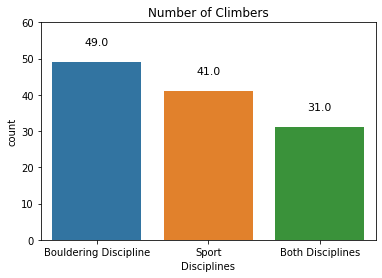

In [61]:
def discipline(sport,boulder,both):
    db = {'Disciplines': ["Bouldering Discipline", "Sport", "Both Disciplines"], 'count': [49, 41, 31]}
    disciplines_bar = pd.DataFrame(db)
    return db
    return disciplines_bar

discipline(sport = only_sport, boulder =  only_boulder, both = both)

# Plot dataframe in a seaborn barplot
ax = sns.barplot(data=disciplines_bar, x="Disciplines", y="count")
plt.title('Number of Climbers')

# Create annotations in chart
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
ax.set_ylim(0,60) #To make space for the annotations